## Custom scenarios using `premise`

#### Github repository: [https://github.com/premise-community-scenarios](https://github.com/premise-community-scenarios)
#### Documentation: [https://premise.readthedocs.io/en/latest/user_scenarios.html](https://premise.readthedocs.io/en/latest/user_scenarios.html)
#### Tutorial author: Romain Sacchi
#### Duration: 2 hours

`premise` accepts [`datapackages`](https://specs.frictionlessdata.io/data-package/) which contain enough information to build and implement a scenario.

Datapackages for `premise` essentially contain:
1. a datapackage.json file, describing the resources contained by the datapackage
2. an inventory file (optional), if `premise` needs to import some inventories not present in ecoinvent
3. a scenario data table, contianing variables and their values for each time step
4. a config-yaml file, telling `premise` how to interpret the variables contained in the scenario data table.

In this exercise, we will want to model a market for bread which will present varying shares for three bread recipes:

* Activated Dough Development
* Straight Dough Method
* Delayed Salt Method

The resulting datapackage [already exists](https://github.com/premise-community-scenarios/scenario-example-bread), let's have a look at it.

## datapackage.json

- It defines the datapackage
- Allows you to fill in metadata (author of the scenario, license, etc.)
- Defines resources (files) and where to find the,

## Scenario data

- Tabular data
- CSV format
- Variables: production volumes, efficiencies, etc.
- Timeseries

## config.yaml

- YAML file
- Gives instructions to premise on what to do.
- One can declare technologies/suppliers, modify their efficiency over time, create markets and substitute suppliers with new ones.

## Additional inventories

- Optional. If your cscenario reuires inventories not prensent in the premise database.

## Running custom scenario in `premise`

In theory, your datapackage is now defined, the necessary metadata is filled and the resources declared, and all the components are present for `premise` to interpret it.

Now, let's have a look at the content of these files, and when this is done, we can run it, like so:

In [1]:
from premise import *
from datapackage import Package
import bw2data as bw

In [2]:
bw.projects.set_current("ei39")

In [3]:
urls = [
    "/Users/romain/GitHub/scenario-example-bread-/datapackage.json",
]

In [4]:
scenarios = [
    {"model": "image", "pathway":"SSP2-Base", "year": 2030},
    {"model": "image", "pathway":"SSP2-Base", "year": 2050},
]

ndb = NewDatabase(
        scenarios = scenarios,        
        source_db="ecoinvent 3.9.1 cutoff",
        source_version="3.9",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        external_scenarios=[Package(url) for url in urls]
)

premise v.(1, 7, 8)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [5]:
ndb.update_external_scenario()


//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.02 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create custom markets.

//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.01 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create custom markets.
Log file of exchanges saved under /Users/romain/GitHub/premise/premise/data/logs.
Done!



In [17]:
ndb.write_db_to_brightway(["bread 2030", "bread 2050"])

Write new database(s) to Brightway2.


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:25


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 13:16:46
  Finished: 10/08/2023 13:17:12
  Total time elapsed: 00:00:25
  CPU %: 92.80
  Memory %: 11.88
Created database: bread 2030


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:27


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 13:20:22
  Finished: 10/08/2023 13:20:50
  Total time elapsed: 00:00:27
  CPU %: 96.70
  Memory %: 14.08
Created database: bread 2050
Generate scenario report.
Report saved under /Users/romain/GitHub/autumn_school_2023/tutorials/custom scenarios/export/scenario_report.
Generate change report.
Report saved under /Users/romain/GitHub/autumn_school_2023/tutorials/custom scenarios.


# Exercise

Copy the bread scenario folder and adapt it to 
* model the progression of battey electric cars in Europe.
* import EURO-6 cars in ecoinvent (copy a EURO-5 car, make it 30% more fuel-efficient and reduce NOx and PMs emission by 90% and 505%, respectively)
* model the phasing out of EURO-3 to EURO-5 cars in Europe.
* model efficiency improvement of ICEVs cars in Europe.

Estimate the impacts over time for *market for transport, passenger car [RER]*

Publish your scenario on Github, share the link of your datapackage.json on the general chat.

In [1]:
from premise import *
from datapackage import Package
import bw2data as bw

In [2]:
bw.projects.set_current("ei39")

In [11]:
import bw2io
i=bw2io.ExcelImporter("/Users/romain/GitHub/premise/premise/data/additional_inventories/lci-batteries.xlsx")
i.apply_strategies()
i.match_database(fields=["name", "location", "unit"])
i.match_database("ecoinvent 3.9.1 cutoff", fields=["name", "reference product", "unit", "location"])
i.match_database("biosphere3", fields=["name", "categories"])
i.statistics()
i.drop_unlinked(i_am_reckless=True)
i.write_database()

Extracted 1 worksheets in 0.07 seconds


Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.11 seconds


Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


47 datasets
490 exchanges
14 unlinked exchanges
  Type biosphere: 2 unique unlinked exchanges
  Type technosphere: 5 unique unlinked exchanges


(47, 490, 14)

In [17]:
list(i.unlinked)

[{'name': 'market for lithium carbonate, battery grade',
  'amount': 0.383,
  'unit': 'kilogram',
  'location': 'GLO',
  'type': 'technosphere',
  'reference product': 'lithium carbonate, battery grade'},
 {'name': 'cobalt sulfate production, from copper mining, economic allocation',
  'amount': 0.547928332840915,
  'unit': 'kilogram',
  'location': 'CN',
  'type': 'technosphere',
  'reference product': 'cobalt sulfate'},
 {'name': 'market for graphite, battery grade',
  'amount': 0.94,
  'unit': 'kilogram',
  'location': 'CN',
  'type': 'technosphere',
  'reference product': 'graphite, battery grade'},
 {'name': 'market for lithium hydroxide, battery grade',
  'amount': 0.246,
  'unit': 'kilogram',
  'location': 'GLO',
  'type': 'technosphere',
  'reference product': 'lithium hydroxide, battery grade'},
 {'name': 'Lithium, ion',
  'amount': 0.1,
  'database': 'biosphere3',
  'unit': 'kilogram',
  'categories': ('water',),
  'type': 'biosphere'},
 {'name': 'NMVOC, non-methane volatile 

In [3]:
#url= "exercise-cars-europe/datapackage.json"
url="https://tomyjsonfile.json"

In [4]:
scenarios = [
    {"model": "image", "pathway":"SSP2-Base", "year": 2035},
    {"model": "image", "pathway":"SSP2-Base", "year": 2050},
    {"model": "image", "pathway":"SSP2-RCP26", "year": 2035},
    {"model": "image", "pathway":"SSP2-RCP26", "year": 2050},
]

ndb = NewDatabase(
        scenarios = scenarios,        
        source_db="ecoinvent 3.9.1 cutoff",
        source_version="3.9",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        external_scenarios=[Package(url)]
)

premise v.(1, 7, 6)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [5]:
ndb.update_electricity()
ndb.update_external_scenario()
ndb.write_db_to_brightway(
    name=[
        "BAU - 2035",
        "BAU - 2050",
        "CA - 2035",
        "CA - 2050",
    ]
)


/////////////////////////// ELECTRICITY ////////////////////////////
Done!


//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.00 seconds
Create custom markets.

//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.00 seconds
Create custom markets.

//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.00 seconds
Create custom markets.

//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.00 seconds
Create custom markets.
Log file of exchanges saved under /Users/romain/GitHub/premise/premise/data/logs.
Done!

Write new database(s) to Brightway2.


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:04


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 15:12:54
  Finished: 10/08/2023 15:13:59
  Total time elapsed: 00:01:04
  CPU %: 80.70
  Memory %: 20.46
Created database: BAU - 2035


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:03


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 15:17:28
  Finished: 10/08/2023 15:18:31
  Total time elapsed: 00:01:03
  CPU %: 81.80
  Memory %: 19.37
Created database: BAU - 2050


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:01


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 15:22:01
  Finished: 10/08/2023 15:23:02
  Total time elapsed: 00:01:01
  CPU %: 81.90
  Memory %: 16.89
Created database: CA - 2035


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:50


Title: Writing activities to SQLite3 database:
  Started: 10/08/2023 15:26:46
  Finished: 10/08/2023 15:27:37
  Total time elapsed: 00:00:50
  CPU %: 85.80
  Memory %: 15.29
Created database: CA - 2050
Generate scenario report.
Report saved under /Users/romain/GitHub/autumn_school_2023/tutorials/custom scenarios/export/scenario_report.
Generate change report.
Report saved under /Users/romain/GitHub/autumn_school_2023/tutorials/custom scenarios.


In [5]:
import bw2data, bw2calc
FU_cars = [
    {act: 1} for db in [
        "ecoinvent 3.9.1 cutoff", "BAU - 2035", "BAU - 2050", "CA - 2035", "CA - 2050", 
    ] for act in bw2data.Database(db) if act["name"] == "market for transport, passenger car"
    and act["location"] == "RER"
]
FU_cars

[{'market for transport, passenger car' (kilometer, RER, None): 1},
 {'market for transport, passenger car' (kilometer, RER, None): 1},
 {'market for transport, passenger car' (kilometer, RER, None): 1},
 {'market for transport, passenger car' (kilometer, RER, None): 1},
 {'market for transport, passenger car' (kilometer, RER, None): 1}]

In [6]:
method = [('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)')]
bw2calc.multi_lca.calculation_setups["Cars EU"] = {
    "inv": FU_cars,
    "ia": method
}

In [7]:
lca = bw2calc.MultiLCA("Cars EU")
acts = [list(d.keys())[0] for d in lca.func_units]

/opt/homebrew/Caskroom/miniforge/base/envs/premise_env/lib/python3.10/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 8.62e+12)
  warnings.warn(msg, UmfpackWarning)


In [8]:
import pandas as pd
results = pd.DataFrame(
    zip(
        [a["name"] for a in acts],
        [a["database"] for a in acts],
        lca.results.flatten()
    ),
    columns=["name", "year", "GWP"]
)

In [9]:
results = results.replace("ecoinvent 3.9.1 cutoff", 2020)
results["year"] = results["year"].astype("str")

Text(0, 0.5, 'kg CO$_2$-eq./km')

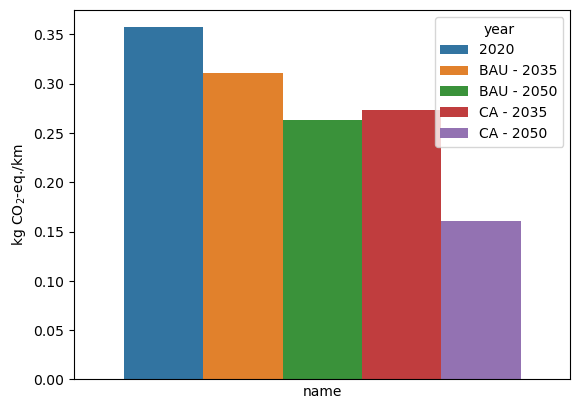

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot with seaborn barplot
sns.barplot(data=results, x='name', y='GWP', hue='year')

plt.xticks([])
plt.ylabel("kg CO$_2$-eq./km")